In [2]:
import torch
import torchvision
import torch.nn as nn
from torch import optim
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset, DataLoader

from skimage import io

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import time

import warnings
warnings.filterwarnings('ignore')

plt.ion()

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


# NOTE**
80 normal and 58 tubeculosis

## Mount to Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
work_dir =  '/content/drive/MyDrive/MontgomerySet/'
xray_pic_dir = os.path.join(work_dir, 'CXR_png/')
right_mask_dir = os.path.join(work_dir, 'ManualMask/rightMask/')
left_mask_dir = os.path.join(work_dir, 'ManualMask/leftMast')

# Showing a Picture

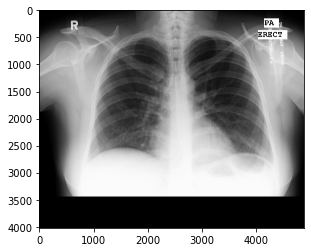

In [7]:
xray_img = io.imread(os.path.join(work_dir, 'CXR_png/MCUCXR_0001_0.png'), as_gray=True)
right_mask = io
plt.imshow(img, cmap='gray')
plt.show()

In [81]:
class TubeXrayDataset(Dataset):

    @staticmethod
    def make_imgname_df(root_dir):
        df = pd.DataFrame({'img_name': []})
        valid_file_type = ('png')
        for base, dirs, files in os.walk(root_dir):
            for file_name in files:
                file_type = file_name.split('.')[-1]
                if file_type  in valid_file_type:
                    df = df.append({'img_name': file_name}, ignore_index=True)

        return df

    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_df = self.make_imgname_df(root_dir)

    def __len__(self):
        return len(self.image_df)

    def __getitem__(self, idx):
        img_name = self.image_df.iloc[idx]['img_name']
        img_path = os.path.join(self.root_dir, img_name)
        image = io.imread(img_path, as_gray=True)
        label = img_name[12]
        
        if self.transform:
            image = self.transform(image)
        
        sample = {'image': image, 'label': label}

        return sample

In [83]:
xray_img_dataset = TubeXrayDataset(xray_pic_dir)

In [84]:
len(xray_img_dataset)

138

In [85]:
xray_img_dataset[137]

{'image': array([[  0,   0,   0, ...,  15, 244,   0],
        [  0,   0,   0, ...,   0,  14,   0],
        [  0,   0,   0, ...,   1,   0,  12],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 'label': '1'}